## Evaluation YAMNET 90-s

#### Setup

In [25]:
import os
import numpy as np
import soundfile as sf
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn import metrics

model = tf.keras.models.load_model("I:/model/vehicle/v1/saved_models/model.h5")
test_dir = "I:/datasets/vehicle/dataset/test_set/npy/"

#### Predict
2 kinds of audio data for predicting are available
- Normal
- Moving average

In [11]:
# 1 audio predict
# audio = np.load("I:/datasets/vehicle/dataset/test_set/npy/pooks-26-may-2020_slice/2020-05-26T00-00-17/2020-05-26T00-00-17_0-2.wav.npy")
# print(audio.shape)
# print(np.expand_dims(audio, axis=0).shape)
# score = model.predict(np.expand_dims(audio, axis=0))
# print(score)

(96, 64)
(1, 96, 64)
[[0.9073905  0.09260958]]


In [26]:
test_path = "I:/datasets/vehicle/dataset/test_set/npy/warsi-7-nov-2019_slice/"
sub_dir = os.listdir(test_path)

y_pred_scores = []

# Whole audio
for p in sub_dir:
    audio_data = []
    sub_path = test_path + p + '/'
    # Sliced audio
    for f in os.listdir(sub_path):
        audio = np.load(sub_path + f)
        audio_data.append(audio)
        
    npy_data = np.array(audio_data)
    score = model.predict(npy_data)
    
    target_scores = score[:,1]
    max_score = np.amax(target_scores)
    
    # Using max score to be each file score
    y_pred_scores.append(max_score)
    
print("Length:", len(y_pred_scores))
print("Example:", y_pred_scores[:10])

Length: 909
Example: [0.99835473, 0.99770576, 0.9985238, 0.99984586, 0.99994206, 0.99968207, 0.9991536, 0.9999974, 0.99998474, 0.9996282]


In [29]:
np.save("yamnet_warsi_pred_scores.npy", y_pred_scores)
# y_pred_scores = np.load("yamnet_pred_scores.npy")
y_true = np.load("warsi_true.npy")

#### AUC

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred_scores)
auc_value = metrics.auc(fpr, tpr)
print(f"AUC: {auc_value}")

AUC: 0.9818081587651598


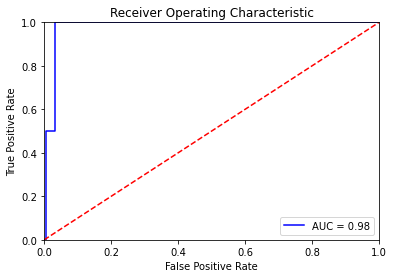

In [31]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc_value)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.savefig('yamnet_warsi_auc.png')
plt.show()

#### Precision and recall

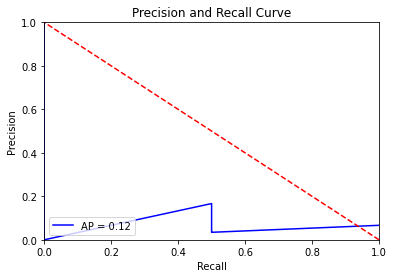

In [32]:
avg_precision_score = metrics.average_precision_score(y_true, y_pred_scores)

precision, recall, thresholds = metrics.precision_recall_curve(y_true, y_pred_scores)

plt.title('Precision and Recall Curve')
plt.plot(recall, precision, 'b', label = 'AP = %0.2f' % avg_precision_score)
plt.legend(loc = 'lower left')
plt.plot([1, 0], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.savefig('yamnet_warsi_prec.png')
plt.show()